# Milestone 1

***
Nama     : Catherine Kezia Wijaya

Batch    : RMT-037

Dashboard: https://public.tableau.com/views/milestone_17297886994870/StatisticDescriptive?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link
***

# i. Identifikasi Masalah

## Latar Belakang

Suatu perusahaan elektronik telah mengalami pertumbuhan dalam beberapa tahun terakhir. Di tengah kompetisi yang semakin ketat, manajemen perusahaan melihat pentingnya untuk memahami lebih dalam tentang perilaku pelanggan, tren penjualan produk, dan bagaimana faktor-faktor tertentu, seperti metode pembayaran dan jenis pengiriman, dapat memengaruhi kesuksesan bisnis mereka.

 Perusahaan ini baru saja menyelesaikan periode penjualan satu tahun, dari September 2023 hingga September 2024. Seorang data analyst diminta untuk menganalisis data transaksi penjualan yang telah terkumpul selama satu tahun ini. Wawasan yang didapat dari data diharapkan bisa berguna untuk mengoptimalkan strategi penjualan, meningkatkan pengalaman pelanggan, serta meningkatkan retensi dan pendapatan.

## Problem Statement

### Problem Statement dijabarkan dengan format SMART Framework

1. **Specific**:  
   Menganalisis data pelanggan untuk memahami demografi pelanggan, pola pembelian, dan performa produk.

2. **Measurable**:  
   Sukses diukur dengan dapat memberikan rekomendasi berdasarkan:
   - Performa produk terlaris serta penilaian (rating) pelanggan untuk memahami preferensi produk.
   - Jumlah transaksi yang selesai
   - Identifikasi pelanggan berdasarkan usia, gender, dan status loyalitas, yang paling berpengaruh terhadap jenis penjualan.
   - Presentase jumlah transaksi yang mencakup add-ons dengan total jumlah transaksi
   - Pengaruh pembelian Add-On terhadap rating

3. **Achievable**:  
   Analisis menggunakan dataset penjualan dari September 2023 hingga September 2024 serta memanfaatkan tools analisis seperti Python dan Pandas, serta visualisasi dengan library matplotlib, seaborn dan membuat dashboard dengan Tableau untuk mendukung analisis dan mengekstrak insight dari dataset.

4. **Relevant**:  
   Menyesuaikan strategi penjualan dan pemasaran, meningkatkan rating dari pelanggan, memaksimalkan keuntungan dari penjualan produk utama dan add-ons, membantu dalam mempertahankan anggota loyalitas dan mengurangi pembatalan pembelian.

5. **Time-bound**:  
   Analisis ini harus selesai dalam **1Minggu**.

Dengan menganalisis data ini secara mendalam, perusahaan dapat membuat keputusan yang lebih baik dalam hal pemasaran, pengelolaan produk, strategi penjualan, dan pengalaman pelanggan.

### Poin Penjabaran

1. Seperti apa central tendency usia pelanggan?
2. Berapa persentase transaksi yang selesai dibandingkan dengan yang dibatalkan?
3. Bagaimana persebaran transaksi berdasarkan jenis kelamin (presentase antara wanita dan pria)?
4. Bagaimana presentase pelanggan yang merupakan anggota program loyalitas dan bukan merupakan anggota?
5. Bagaimana presentase jumlah transaksi setiap jenis produk?
6. Apakah ada korelasi antara rating produk yang diberikan pelanggan dengan jumlah produk yang terjual? Apakah produk dengan rating lebih tinggi cenderung memiliki penjualan lebih besar?
7. Apakah anggota loyalitas lebih cenderung membeli produk dalam jumlah yang lebih besar dari non-anggota?
8. Apakah pelanggan yang membeli add-ons lebih cenderung memberikan rating produk yang lebih tinggi dibandingkan mereka yang tidak membeli add-ons?
***

# ii. Import Library

Library yang digunakan untuk analisis ini

In [280]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

***

# iii. Data Loading

Dataset berisi berisi record transaksi penjualan di perusahaan elektronik selama periode satu tahun, yang berisi informasi tentang demografi pelanggan, jenis produk, dan perilaku pembelian. Data ini diambil dari Kaggle.

URL dataset: https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024

Data kemudian dibaca dan dibuat dalam bentuk DataFrame

In [297]:
# Membaca csv menggunakan fungsi read_csv
data = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
data

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


Berikut memperlihatkan data bagian atas dan data bagian bawah

In [282]:
# Tampilan 5 data di atas
data.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [283]:
# Tampilan 5 data di bawah
data.tail()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34
19999,19998,27,NaN,Yes,Laptop,LTP123,4,Completed,Bank Transfer,674.32,674.32,1,2024-01-29,Expedited,NaN,0.00


In [284]:
data.shape

(20000, 16)

Terdapat 20000 baris dan 16 kolom
***

# iv. Data Cleaning

In [285]:
data.head(10)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78
6,1005,25,Female,No,Smartwatch,SKU1003,3,Completed,Paypal,7603.47,844.83,9,2024-01-30,Overnight,NaN,0.00
7,1005,25,Female,No,Laptop,SKU1005,3,Completed,Debit Card,4175.64,463.96,9,2024-06-24,Overnight,"Extended Warranty,Extended Warranty",75.33
8,1006,24,Male,No,Smartphone,SKU1004,2,Cancelled,Debit Card,5538.33,791.19,7,2023-10-03,Standard,Impulse Item,43.05
9,1006,24,Male,Yes,Laptop,SKU1005,3,Completed,Cash,4175.64,463.96,9,2024-01-01,Express,NaN,0.00


Selanjutnya ingin dianalisa kebersihan datanya:
-  Format data `Add-ons Purchased` berantakan maka perlu dibuang
-  Data `Purchase Date` tidak relevan pada analisa maka juga dibuang
-  Perlu adanya kolom `Total Transaction` yang menambahkan `Total Price` dengan `Add-on Total`

In [298]:
# Menghapus kolom Add-on
data = data.drop(columns=['Add-ons Purchased', 'Purchase Date'])

In [299]:
# Menambahkan kolom Total Transaction
data['Total Transaction'] = data['Total Price'] + data['Add-on Total']

Ingin dilihat rangkuman informasi tentang DataFrame

In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Shipping Type      20000 non-null  object 
 13  Add-on Total       20000 non-null  float64
 14  Total Transaction  20000 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 2.3+ MB


- Terdapat 1 nilai null di kolom Gender, data baris dengan null ini dihapus


In [300]:
data = data.dropna(subset=['Gender'])

In [301]:
data.isnull().sum()

Customer ID          0
Age                  0
Gender               0
Loyalty Member       0
Product Type         0
SKU                  0
Rating               0
Order Status         0
Payment Method       0
Total Price          0
Unit Price           0
Quantity             0
Shipping Type        0
Add-on Total         0
Total Transaction    0
dtype: int64

Karena kolom data Gender, Loyalty Member, Product Type, Order Status, Payment Method, dan Shipping Type bersifat Kategorikal, maka perlu dijabarkan isi data uniknya apa saja, dan apakah data sudah bersih.

In [302]:
# Menunjukkan nilai unik untuk kolom Gender, Loyalty Member, Product Type, Rating, Order Status, Payment Method, dan Shipping Type
print('Gender: ', data['Gender'].unique())
print('Loyalty Member: ', data['Loyalty Member'].unique())
print('Product Type: ', data['Product Type'].unique())
print('Order Status: ', data['Order Status'].unique())
print('Payment Method: ', data['Payment Method'].unique())
print('Shipping Type: ', data['Shipping Type'].unique())

Gender:  ['Male' 'Female']
Loyalty Member:  ['No' 'Yes']
Product Type:  ['Smartphone' 'Tablet' 'Laptop' 'Smartwatch' 'Headphones']
Order Status:  ['Cancelled' 'Completed']
Payment Method:  ['Credit Card' 'Paypal' 'Cash' 'Debit Card' 'Bank Transfer' 'PayPal']
Shipping Type:  ['Standard' 'Overnight' 'Express' 'Same Day' 'Expedited']


Ada value yang double pada `Payment Method` yaitu `Paypal` dan `Paypal` ingin dijadikan satu kategori yaitu `PayPal`

In [303]:
# Ganti semua Paypal menjadi Paypal
data['Payment Method'] = data['Payment Method'].replace('Paypal', 'PayPal')

print('Payment Method: ', data['Payment Method'].unique())

Payment Method:  ['Credit Card' 'PayPal' 'Cash' 'Debit Card' 'Bank Transfer']


In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19999 entries, 0 to 19998
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        19999 non-null  int64  
 1   Age                19999 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     19999 non-null  object 
 4   Product Type       19999 non-null  object 
 5   SKU                19999 non-null  object 
 6   Rating             19999 non-null  int64  
 7   Order Status       19999 non-null  object 
 8   Payment Method     19999 non-null  object 
 9   Total Price        19999 non-null  float64
 10  Unit Price         19999 non-null  float64
 11  Quantity           19999 non-null  int64  
 12  Shipping Type      19999 non-null  object 
 13  Add-on Total       19999 non-null  float64
 14  Total Transaction  19999 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 2.4+ MB


Berikut adalah tabel setelah cleaning

In [305]:
data

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Shipping Type,Add-on Total,Total Transaction
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,Standard,40.21,5578.54
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,PayPal,741.09,247.03,3,Overnight,26.09,767.18
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,Express,0.00,1855.84
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,Overnight,60.16,3224.92
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,Express,35.56,77.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19996,27,Female,No,Smartphone,SMP234,5,Completed,Credit Card,3419.04,1139.68,3,Same Day,0.00,3419.04
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,Expedited,0.00,6838.08
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,Standard,0.00,2697.28
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,Standard,198.98,2004.88


In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19999 entries, 0 to 19998
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        19999 non-null  int64  
 1   Age                19999 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     19999 non-null  object 
 4   Product Type       19999 non-null  object 
 5   SKU                19999 non-null  object 
 6   Rating             19999 non-null  int64  
 7   Order Status       19999 non-null  object 
 8   Payment Method     19999 non-null  object 
 9   Total Price        19999 non-null  float64
 10  Unit Price         19999 non-null  float64
 11  Quantity           19999 non-null  int64  
 12  Shipping Type      19999 non-null  object 
 13  Add-on Total       19999 non-null  float64
 14  Total Transaction  19999 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 2.4+ MB


In [307]:
# Ekspor data yang sudah bersih ke csv
data.to_csv('electronic_sales_cleaned.csv', index=False)

***

# v. Data Exploration

Karena data banyak maka menggunakan Z-Test

## 1. Seperti apa persebaran dan distribusi usia pelanggan?

In [134]:
# Menyimpan data untuk order yang completed
completed_order = data[data['Order Status'] == 'Completed']

In [310]:

age_mean = data['Age'].mean()
age_median = data['Age'].median()
age_modus= data['Age'].mode()
age_std = data['Age'].std()
age_skew = data['Age'].skew()
age_kurt = data['Age'].kurtosis()

print('Age Average:', age_mean)
print('Age Median:', age_median)
print('Age Modus:', age_modus)
print('Age Standar Deviasi:', age_std)
print('Age Skewness:', age_skew)
print('Age Kurtosis:', age_kurt)

Age Average: 48.995199759988
Age Median: 49.0
Age Modus: 0    40
Name: Age, dtype: int64
Age Standar Deviasi: 18.0385258765906
Age Skewness: 0.002417689910756836
Age Kurtosis: -1.1916461254556927


- Rata-rata dan median hampir sama, sekitar 49 tahun, ini menunjukkan bahwa distribusi usia relatif simetris.
- Standar deviasi bernilai `18.06` relatif besar, ada variasi yang signifikan dalam usia pelanggan, ada pelanggan yang jauh lebih muda dan lebih tua dari rata-rata.
- Nilai skewness `0.0057` yang sangat dekat dengan 0 menunjukkan bahwa distribusi usia adalah normal. Tidak ada kecenderungan signifikan ke arah usia yang lebih tua atau lebih muda
- Nilai kurtosis `-1.197` menunjukkan bahwa data usia tidak memiliki puncak yang tajam, dan ada lebih banyak data pada ekor distribusi. 

<Axes: >

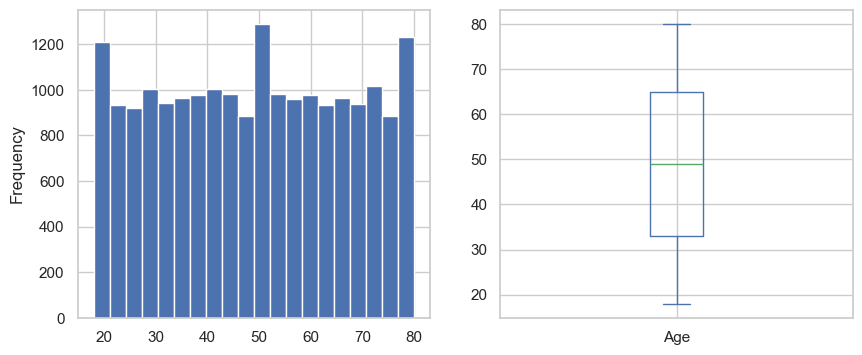

In [242]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# menampilkan histogram dan plot box data
data['Age'].plot(kind='hist',bins=20,ax=ax[0])
data['Age'].plot(kind='box',ax=ax[1])

## 2. Bagaimana persebaran transaksi berdasarkan jenis kelamin (presentase antara wanita dan pria)?

Gender
Male      10164
Female     9835
Name: count, dtype: int64
Persentase pria: 50.82%
Persentase wanita: 49.18%


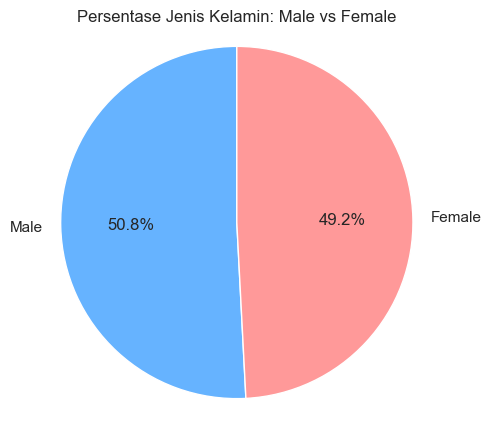

In [153]:
# Mengelompokkan transaksi yang dilakukan berdasarkan jenis kelamin
male = len(data[data['Gender'] == 'Male'])
female = len(data[data['Order Status'] == 'Female'])
print(data['Order Status'].value_counts())

# Menghitung total transaksi
total = len(data)

# Menghitung persentase
presentase_completed = (male / total) * 100
presentase_cancelled = (female / total) * 100
print(f"Persentase transaksi yang selesai: {presentase_completed:.2f}%")
print(f"Persentase transaksi yang dibatalkan: {presentase_cancelled:.2f}%")

# Data untuk pie chart
labels = ['Completed', 'Cancelled']
sizes = [presentase_completed, presentase_cancelled]
colors = ['#66b3ff', '#ff9999']

# Membuat pie chart
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Menjaga pie chart berbentuk lingkaran
plt.title('Persentase Transaksi: Completed vs Cancelled')
plt.show()

Persebaran antara pria dan wanita merata, 50.8% transaksi dilakukan oleh pria dan 49.2% dilakukan oleh wanita.

## 3. Berapa persentase transaksi yang selesai dibandingkan dengan yang dibatalkan?

Order Status
Completed    13431
Cancelled     6568
Name: count, dtype: int64
Persentase transaksi yang selesai: 67.16%
Persentase transaksi yang dibatalkan: 32.84%


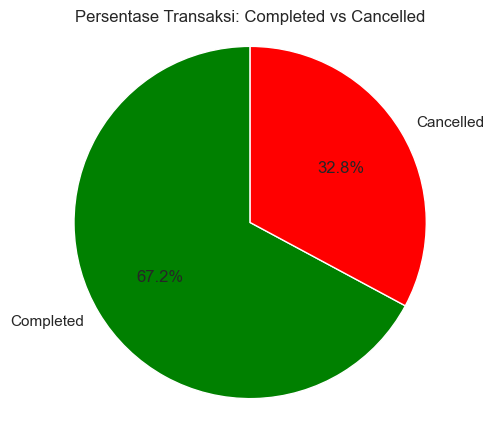

In [243]:
# Menghitung jumlah transaksi yang selesai dan dibatalkan
completed = len(data[data['Order Status'] == 'Completed'])
cancelled = len(data[data['Order Status'] == 'Cancelled'])
print(data['Order Status'].value_counts())

# Menghitung total transaksi
total = len(data)

# Menghitung persentase
presentase_completed = (completed / total) * 100
presentase_cancelled = (cancelled / total) * 100
print(f"Persentase transaksi yang selesai: {presentase_completed:.2f}%")
print(f"Persentase transaksi yang dibatalkan: {presentase_cancelled:.2f}%")

# Data untuk pie chart
labels = ['Completed', 'Cancelled']
sizes = [presentase_completed, presentase_cancelled]
colors = ['green', 'red']

# Membuat pie chart
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Menjaga pie chart berbentuk lingkaran
plt.title('Persentase Transaksi: Completed vs Cancelled')
plt.show()

Didapat bahwa `67.16%` dari total transaksi yang dilakukan berhasil diselesaikan, sedangkan `32.84%` transaksi dibatalkan. `2/3` dari seluruh transaksi diselesaikan

## 4. Bagaimana presentase pelanggan yang merupakan anggota program loyalitas dan bukan merupakan anggota?

Loyalty Member
No     15657
Yes     4342
Name: count, dtype: int64
Persentase Status Loyalty: 21.71%
Persentase No Loyalty: 78.29%


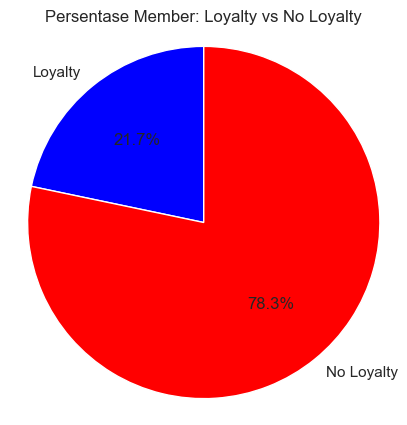

In [244]:
# Menghitung jumlah transaksi yang selesai dan dibatalkan
loyalty = len(data[data['Loyalty Member'] == 'Yes'])
no_loyalty = len(data[data['Loyalty Member'] == 'No'])
print(data['Loyalty Member'].value_counts())

# Menghitung persentase
presentase_loyalty = (loyalty / total) * 100
presentase_no_loyalty = (no_loyalty / total) * 100
print(f"Persentase Status Loyalty: {presentase_loyalty:.2f}%")
print(f"Persentase No Loyalty: {presentase_no_loyalty:.2f}%")

# Data untuk pie chart
labels = ['Loyalty', 'No Loyalty']
sizes = [presentase_loyalty, presentase_no_loyalty]
colors = ['blue', 'red']

# Membuat pie chart
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Menjaga pie chart berbentuk lingkaran
plt.title('Persentase Member: Loyalty vs No Loyalty')
plt.show()

`78.3%` dari seluruh transaksi dilakukan oleh Non-Loyalty dan hanya `21.7%` dilakukan oleh Loyalty. Mayoritas transaksi dilakukan tanpa member Loyalty

## 5. Bagaimana presentase jumlah transaksi setiap jenis produk?

In [245]:
transaction = data['Product Type'].value_counts()

total = len(data)
# Menghitung persentase setiap jenis produk
presentase_transactions = (transaction / total) * 100

# Mengubah hasil menjadi DataFrame
df_presentase = pd.DataFrame({
    'Jumlah Transaksi': transaction,
    'Persentase': presentase_transactions
})

print(df_presentase)

              Jumlah Transaksi  Persentase
Product Type                              
Smartphone                5978   29.891495
Tablet                    4104   20.521026
Laptop                    3972   19.860993
Smartwatch                3934   19.670984
Headphones                2011   10.055503


C:\Users\Kezia\AppData\Local\Temp\ipykernel_36216\2719888724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_presentase.index, y='Jumlah Transaksi', data=df_presentase, palette=warna)


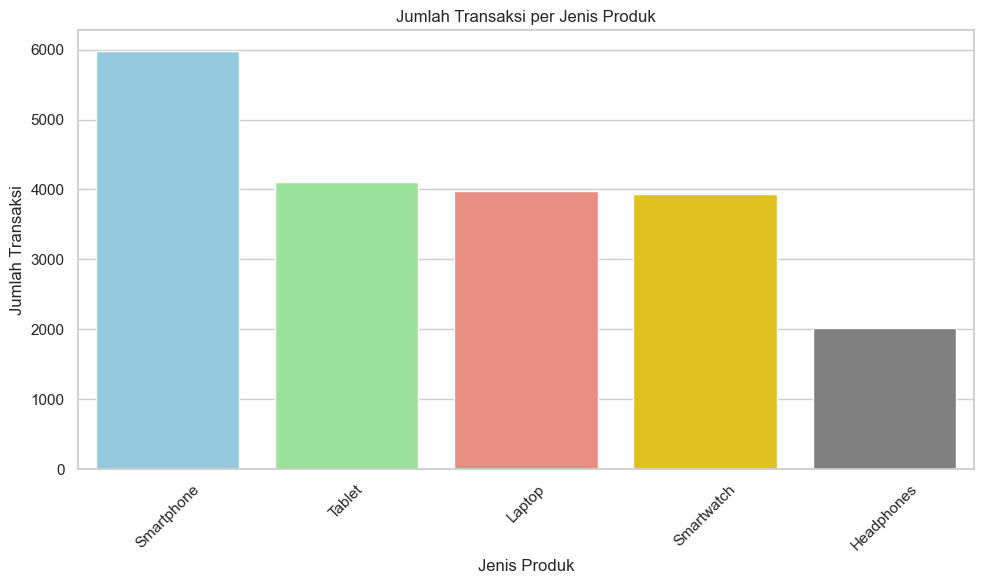

In [248]:
plt.figure(figsize=(10, 6))
warna = ['skyblue', 'lightgreen', 'salmon', 'gold', 'gray']
sns.barplot(x=df_presentase.index, y='Jumlah Transaksi', data=df_presentase, palette=warna)

# Menambahkan label dan judul
plt.title('Jumlah Transaksi per Jenis Produk')
plt.xlabel('Jenis Produk')
plt.ylabel('Jumlah Transaksi')

# Menampilkan grafik
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Jumlah transaksi setiap jenis data cukup mendekati satu sama lain. Penjualan paling banyak pada tipe Smartphone dengan presentase `29.9%` dan penjualan paling sedikit pada jenis produk Headphones dengan presentase `10.1%`

## 6. Apakah ada korelasi antara rating produk yang diberikan pelanggan dengan jumlah produk yang terjual?

H0: Tidak ada hubungan antara rating produk yang diberikan pelanggan dengan jumlah produk yang terjual

H1: Ada hubungan antara rating produk yang diberikan pelanggan dengan jumlah produk yang terjual

Karena kedua data bersifat numerik, maka korelasi dianalisa dengan Pearson



In [257]:
tau, p_value = stats.kendalltau(data['Rating'], data['Quantity'])
print(f'Koefisien Kendall: {tau}')
print(f"P value antara Rating dan Quantity: {p_value}")

Koefisien Kendall: -0.006802166252049123
P value antara Rating dan Quantity: 0.21652218333505713


P-value bernilai 0.21, berarti gagal tolak H0. Tidak ada hubungan yang signifikan antara rating produk dan jumlah produk yang terjual


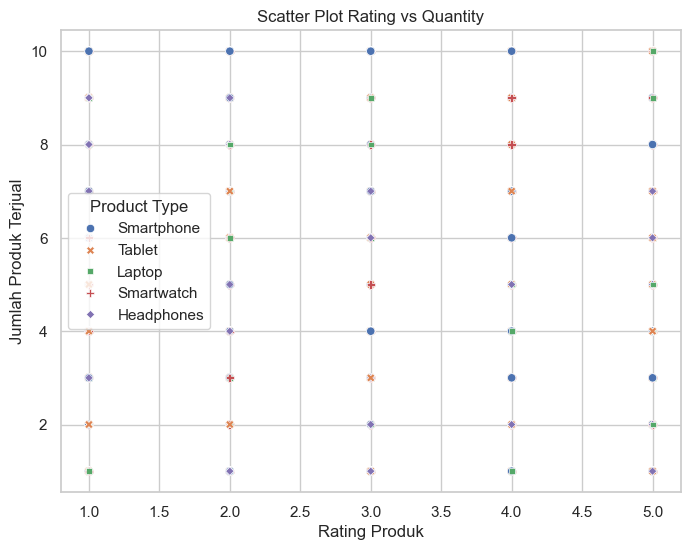

In [313]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Quantity', data=data, hue='Product Type', style='Product Type')

# Menambahkan judul dan label
plt.title('Scatter Plot Rating vs Quantity')
plt.xlabel('Rating Produk')
plt.ylabel('Jumlah Produk Terjual')
plt.show()

Dari yang sudah dijabarkan sebelumnya urutan produk dari yang terbanyak hingga paling sedikit adalah Smartphone, Tablet, Laptop, Smartwatch dan Headphones

## 7. Apakah anggota status loyalitas lebih cenderung membeli lebih banyak dari non-anggota?

H0: Status loyalitas tidak mempengaruhi jumlah total transaksi

H1: Status loyalitas mempengaruhi jumlah total transaksi

Analisis menggunakan T-Test Independent

In [264]:
loyal_members = data[data['Loyalty Member'] == 'Yes']['Total Transaction']
non_loyal_members = data[data['Loyalty Member'] == 'No']['Total Transaction']

# Melakukan uji t
t_statistic, p_value = stats.ttest_ind(loyal_members, non_loyal_members)

# Hasil uji
print("Statistik t:", t_statistic)
print("p-value:", p_value)

Statistik t: -1.2314284244520741
p-value: 0.21817715292470408


P-value `0.22` karena lebih dari 0.05 maka gagal tolak H0. Status loyalitas tidak mempengaruhi jumlah total transaksi

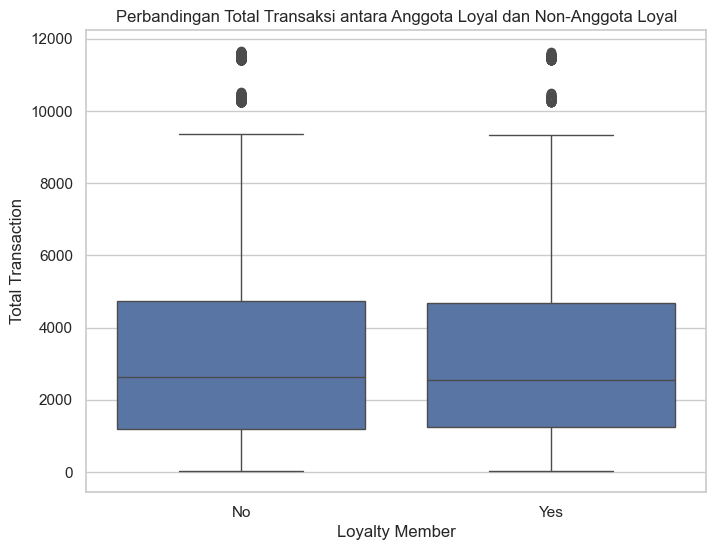

In [266]:
# Membuat box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loyalty Member', y='Total Transaction', data=data)
plt.title('Perbandingan Total Transaksi antara Anggota Loyal dan Non-Anggota Loyal')
plt.xlabel('Loyalty Member')
plt.ylabel('Total Transaction')
plt.show()

## 8. Apakah pelanggan yang membeli add-ons lebih cenderung memberikan rating produk yang lebih tinggi dibandingkan yang tidak membeli add-ons?

H0: Tidak ada hubungan antara pembelian Add-ons dengan rating

H1: Ada hubungan antara pembelian Add-ons dengan rating

Karena pelanggan dengan add-ons dan tidak add-ons tidak seimbang, maka tidak bisa pakai Kendall. Analisis menggunakan T-test

In [276]:
customers_with_addons = data[data['Add-on Total'] > 0]['Rating']
customers_without_addons = data[data['Add-on Total'] == 0]['Rating']

# Melakukan uji t
t_statistic, p_value = stats.ttest_ind(customers_with_addons, customers_without_addons)

# Hasil uji
print("Statistik t:", t_statistic)
print("p-value:", p_value)

Statistik t: -1.0633187025914033
p-value: 0.28765028656179786


P-value bernilai `0.28` berarti gagal tolak H0. Menunjukkan bahwa tidak ada hubungan antara pembelian Add-ons dengan rating

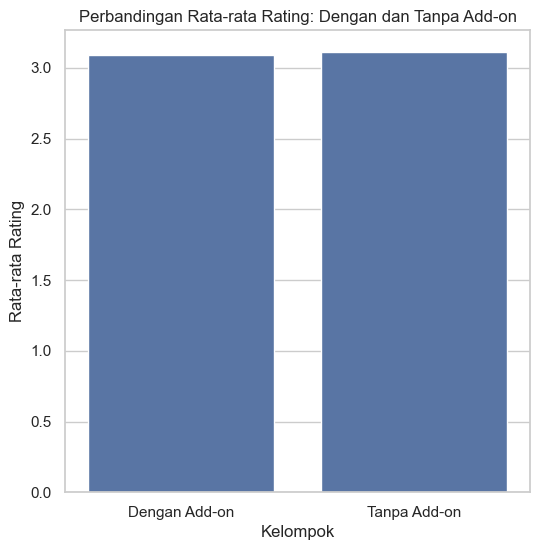

In [279]:
# Menghitung rata-rata rating dari kedua kelompok
avg_with_addons = np.mean(customers_with_addons)
avg_without_addons = np.mean(customers_without_addons)

# Membuat data untuk plot
labels = ['Dengan Add-on', 'Tanpa Add-on']
averages = [avg_with_addons, avg_without_addons]

# Membuat bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x=labels, y=averages)

# Menambahkan label pada sumbu dan judul
plt.title('Perbandingan Rata-rata Rating: Dengan dan Tanpa Add-on')
plt.xlabel('Kelompok')
plt.ylabel('Rata-rata Rating')

plt.show()

# vi. Kesimpulan

Berdasarkan analisis data penjualan yang telah dilakukan, dapat diambil beberapa kesimpulan:
- Produk memiliki demografi pada usia sekitar 49 tahun, dan populer untuk pria dan juga wanita. Tekankan promosi pada kedua kalangan ini.
- Mayoritas transaksi berhasil diselesaikan, dan kebanyakan transaksi dilakukan tanpa Membership Loyalty. Perlu menambahkan benefit lebih untuk menjadi member Loyalty supaya jumlah member meningkat.
- Produk yang paling populer adalah Handphone, perlu menambahkan produk handphone dan juga menekankan marketing untuk jenis produk lain
- Tidak ada kolerasi relevan antara jenis produk, rating, status loyalty dan pembelian add-ons.